In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import pickle as pkl
import re
import ast

In [8]:
def data_loader(filename):
    with open(filename, "r") as file:
        lines = file.readlines()

    # initializing variables
    n = p = m = noise_level = 0
    data = []
    for line in lines:
        try:
            if "Running trials for" in line:
                n = int(re.search(r"n = (\d+)", line).group(1))
                p = int(re.search(r"p = (\d+)", line).group(1))
                m = int(re.search(r"m = (\d+)", line).group(1))
            elif "Cross validating alpha under noise level:" in line:
                noise_level = float(
                    re.search(r"noise level:  (\d+\.\d+)", line).group(1)
                )
            elif "Trial:" in line:
                trial_num = int(re.search(r"Trial:  (\d+)", line).group(1))
                params = ast.literal_eval(
                    re.search(r"Best params:  ({.*?})", line).group(1)
                )
                error = float(re.search(r"Lowest Error:  (\d+\.\d+)", line).group(1))
                params["trial_num"] = trial_num
                params["lowest_error"] = error
                params["n"] = n
                params["p"] = p
                params["m"] = m
                params["noise_level"] = noise_level
                data.append(params)
        except Exception as e:
            print(f"Error parsing line: {e}")

    return pd.DataFrame(data)

In [9]:
# specify the directory you want to search in
directory = "outputs/July9"

# use glob to match the file pattern '*.out'
files = glob.glob(os.path.join(directory, "*.out"))

In [10]:
files

['outputs/July9/slurm-7590339.out']

In [11]:
# loop over the list of files from the glob.glob() method
# files = ["outputs/slurm-7484898.out", "outputs/slurm-7484899.out"]
files = ['outputs/July9/slurm-7590339.out']
final_results = pd.DataFrame()
for filename in files:
    df = data_loader(filename)
    final_results = final_results.append(df)

/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_43170/4253626020.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append(df)


In [12]:
final_results

,K,N_bag,atom_bag_percent,replace_flag,signal_bag_percent,trial_num,lowest_error,n,p,m,noise_level
0,13,1,0.6,False,1.0,0,0.016888,600,1000,20,0.12
1,15,1,0.7,False,1.0,1,0.013901,600,1000,20,0.12
2,19,75,0.7,False,1.0,2,0.016281,600,1000,20,0.12
3,17,75,0.5,False,1.0,3,0.016096,600,1000,20,0.12
4,21,50,0.6,False,0.8,4,0.015993,600,1000,20,0.12
...,...,...,...,...,...,...,...,...,...,...,...
95,11,100,0.8,False,1.0,15,0.045963,600,1000,20,0.20
96,11,100,0.8,False,1.0,16,0.041944,600,1000,20,0.20
97,7,100,0.7,False,1.0,17,0.048984,600,1000,20,0.20
98,19,10,0.5,False,1.0,18,0.041565,600,1000,20,0.20


In [46]:
OMP_filename = "outputs/OMP_baseline.out"


with open(OMP_filename, "r") as f:
    text = f.read()

    noise_levels = re.findall(r"Average best K for noise level:  (\d+\.\d+)", text)
    average_mse = re.findall(r"with MSE:  (\d+\.\d+)", text)

# Convert to float for further calculations
noise_levels = [float(i) for i in noise_levels]
average_mse = [float(i) for i in average_mse]


OMP = pd.DataFrame({"noise_level": noise_levels, "average_mse": average_mse})

In [47]:
OMP

,noise_level,average_mse
0,0.02,0.000467
1,0.04,0.001864
2,0.06,0.004136
3,0.08,0.007298
4,0.10,0.011456
5,0.12,0.016344
6,0.14,0.022362
7,0.16,0.029135
8,0.18,0.036784
9,0.20,0.045330


In [34]:
BOMP_filenames = ["outputs/slurm-7484898.out", "outputs/slurm-7484899.out"]

Total_BOMP = pd.DataFrame()
for BOMP_filename in BOMP_filenames:
    with open(BOMP_filename, "r") as f:
        text = f.read()

        noise_levels = re.findall(r"Noise level:  (\d+\.\d+)", text)
        average_mse = re.findall(r"Avg Lowest MSE:  (\d+\.\d+)", text)

    # Convert to float for further calculations
    noise_levels = [float(i) for i in noise_levels]
    average_mse = [float(i) for i in average_mse]

    BOMP = pd.DataFrame({"noise_level": noise_levels, "average_mse": average_mse})

    Total_BOMP = Total_BOMP.append(BOMP)

Total_BOMP = Total_BOMP.groupby("noise_level").min().reset_index()

/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_47953/657417169.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Total_BOMP = Total_BOMP.append(BOMP)
/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_47953/657417169.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Total_BOMP = Total_BOMP.append(BOMP)


In [50]:
BOMP

,noise_level,average_mse
0,0.12,0.016454
1,0.14,0.022688
2,0.16,0.029814
3,0.18,0.037742
4,0.20,0.046560


In [48]:
Merged_Results = pd.merge(
    OMP, Total_BOMP, on="noise_level", suffixes=("_OMP", "_Total_BOMP")
).rename(columns={"average_mse_OMP": "OMP_mse", "average_mse_Total_BOMP": "BOMP_mse"})
Merged_Results["Improvements"] = (
    1 - Merged_Results["BOMP_mse"] / Merged_Results["OMP_mse"]
)
Merged_Results

,noise_level,OMP_mse,BOMP_mse,Improvements
0,0.12,0.016733,0.016007,0.043392
1,0.14,0.022747,0.022219,0.023196
2,0.16,0.029592,0.029484,0.003638
3,0.18,0.037294,0.037354,-0.001612
4,0.20,0.045774,0.046252,-0.010448


# Log Analysis

In [13]:
# specify the directory you want to search in
directory = "outputs/July9"

log_files = glob.glob(os.path.join(directory, "*.pkl"))

In [19]:
with open(log_files[0], "rb") as f:
    res_log = pkl.load(f)[0]

In [20]:
res_log.keys()
#dict_keys(['parameters', 'noise_level_lowest_MSE', 'log'])

dict_keys(['parameters', 'noise_level_lowest_MSE', 'log'])

In [33]:
parameters = res_log["parameters"]
noise_level_lowest_MSE = res_log["noise_level_lowest_MSE"]
log = res_log["log"]

temp_log = log[0]

In [32]:
temp_log.keys()

dict_keys(['noise_level', 'trial', 'cv_error_lst', 'lowest_error', 'best_params', 'param_lst'])

In [37]:
final_log_df = pd.DataFrame()
for temp_log in log:
    single_log_df = pd.DataFrame(temp_log['param_lst'])
    single_log_df['noise_level'] = temp_log['noise_level']
    single_log_df['trial'] = temp_log['trial']
    single_log_df['mse'] = temp_log['cv_error_lst']
    final_log_df = final_log_df.append(single_log_df)
final_log_df = final_log_df.reset_index(drop=True)

/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_43170/4137781969.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_log_df = final_log_df.append(single_log_df)
/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_43170/4137781969.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_log_df = final_log_df.append(single_log_df)
/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_43170/4137781969.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_log_df = final_log_df.append(single_log_df)
/var/folders/r9/cr3fkwq558n9mv4z9n1c01k00000gn/T/ipykernel_43170/4137781969.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

In [39]:
final_log_df

,K,N_bag,atom_bag_percent,replace_flag,signal_bag_percent,noise_level,trial,mse
0,1,1,0.5,False,0.6,0.12,0,0.060431
1,1,1,0.5,False,0.8,0.12,0,0.062958
2,1,1,0.5,False,1.0,0.12,0,0.060545
3,1,1,0.6,False,0.6,0.12,0,0.062424
4,1,1,0.6,False,0.8,0.12,0,0.063727
...,...,...,...,...,...,...,...,...
215995,39,100,0.9,False,0.8,0.20,19,0.052697
215996,39,100,0.9,False,1.0,0.20,19,0.062825
215997,39,100,1.0,False,0.6,0.20,19,0.053102
215998,39,100,1.0,False,0.8,0.20,19,0.052767


In [42]:
df = final_log_df[['K', 'noise_level', 'mse']].groupby(['K', 'noise_level']).mean().reset_index()

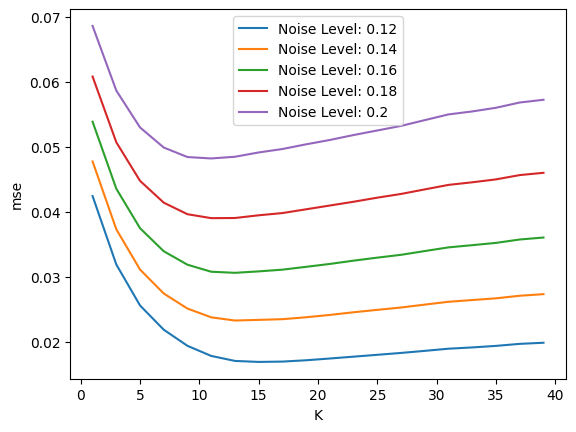

In [48]:
groups = df.groupby('noise_level')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['K'], group['mse'], label=f'Noise Level: {name}')

ax.set_xlabel('K')
ax.set_ylabel('mse')
ax.legend()

plt.savefig('BOMP MSE vs K.png')

plt.show()